<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 6. Обучение без учителя (Кластеризация)

## Цель занятия:

Изучить методы обучения без учителя, познакомиться с алгоритмами кластеризации, понять их применение и реализовать модели кластеризации с использованием различных алгоритмов.

Задача практики:
- Определение обучения без учителя
- Разбор алгоритмов DBSSCAN, K-means
- Метрики качества кластеризации
- Пример полезных задач, которые решает кластеризация

## Задача обучения без учителя

Обучение без учителя (unsupervised learning) — это тип машинного обучения, при котором алгоритм работает с неразмеченными данными, то есть без заранее известных правильных ответов (меток классов, целевых значений и т.п.).
Модель пытается самостоятельно найти закономерности, структуры или скрытые зависимости в данных.

Основные задачи обучения без учителя:

1. Кластеризация — группировка похожих объектов.
Пример: алгоритм K-Means делит клиентов банка на сегменты по их поведению.

2. Снижение размерности — упрощение данных при сохранении основной информации.
Пример: метод PCA (анализ главных компонент) используется для визуализации данных.

**В задачах обучения без учителя существует только X, в данном контексте мы не рассматриваем y.**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/wine.csv')
df_base = df.copy()

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [6]:
category_columns: list[str] = df.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)
df.type_white = df.type_white.astype(int)

df_base = df_base.drop('type', axis=1)
df_base.type_white = df.type_white.astype(int)

/tmp/ipython-input-1586629681.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_base.type_white = df.type_white.astype(int)


In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,1
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,1


## Кластеризация и алгоритмы

**Кластеризация** — это метод обучения без учителя, при котором объекты (данные) группируются в такие кластеры, чтобы объекты внутри одного кластера были похожи друг на друга, а объекты из разных кластеров — сильно различались.

Другими словами, алгоритм сам ищет структуру или естественные группы в данных, без заранее заданных меток.

**Как в общем работают все алгоритмы кластеризации**

Алгоритм оценивает похожесть объектов (по расстоянию между точками в многомерном пространстве признаков — чаще всего Евклидово расстояние).

Далее:

1. Определяет центры кластеров (или выбирает начальные точки)

2. Распределяет объекты по ближайшему кластеру

3. Пересчитывает центры

4. Повторяет процесс, пока кластеры не стабилизируются

**Алгоритмы кластеризации делятся на 2 группы**

1. число кластеров известно заранее
2. число кластеров неизвестно заранее

### K-means

In [8]:
X = df.to_numpy()

In [9]:
!pip install ipywidgets plotly

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization_3d(X, max_clusters=10, max_iterations=50):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Снижаем размерность до 3 компонент через PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    def plot_kmeans_iteration(X_pca, centroids, labels=None, step=0):
        clear_output(wait=True)
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        if labels is not None:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       s=30, alpha=0.6)

        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
                   c='red', marker='x', s=100, label='Centroids')

        ax.set_title(f'K-means Iteration {step}', fontsize=14)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.legend()
        plt.show()

    def k_means_interactive(X_pca, k, max_iters):
        np.random.seed(42)
        centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X_pca[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X_pca, centroids, labels, step)
            new_centroids = np.array([X_pca[labels == i].mean(axis=0) for i in range(k)])
            if np.allclose(centroids, new_centroids, atol=1e-6):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X_pca, k, max_iters)

    # Ползунки
    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)


In [11]:
%matplotlib inline

interactive_kmeans_visualization_3d(X)

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

### Алгоритм K-means

Идея алгоритма:

1. Выбираем число кластеров k (например, 3 группы покупателей).

2. Случайно задаём центры кластеров — выбираем  k точек из данных как стартовые центроиды.

3. Назначаем точки к ближайшему центру (по расстоянию, обычно Евклидову).

4. Пересчитываем центры кластеров — берём среднее всех точек в каждом кластере.

5. Повторяем процесс

In [12]:
from sklearn.cluster import KMeans
import pandas as pd

# Обучаем K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean()

cluster_means.round(2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,6.85,0.26,0.31,4.04,0.04,28.62,121.90,0.99,3.22,0.49,10.48,5.59
1,7.00,0.29,0.36,10.52,0.06,44.84,172.48,1.00,3.14,0.49,9.36,5.51
2,10.52,0.41,0.49,2.76,0.11,13.19,37.55,1.00,3.17,0.76,10.42,5.86
3,6.68,0.28,0.33,4.08,0.04,31.59,115.59,0.99,3.20,0.48,12.03,6.71
4,7.67,0.62,0.17,2.46,0.09,16.69,53.75,1.00,3.34,0.60,9.82,5.21
5,7.36,0.46,0.25,2.47,0.07,16.99,40.42,0.99,3.39,0.68,11.71,6.30


### Метод определения лучшего количества кластеров

Метод локтя — это способ определить оптимальное количество кластеров k для алгоритма K-Means.

Идея простая:

K-Means пытается минимизировать внутрикластерную сумму квадратов расстояний (инерцию, inertia_);

При увеличении k значение inertia всегда уменьшается, т.к. чем больше кластеров, тем ближе центроиды к точкам;

Но начиная с некоторого момента, уменьшение становится незначительным — этот “излом” графика напоминает локоть. Этот “локоть” и считается оптимальным числом кластеров — после него добавление новых кластеров не даёт большой выгоды.

Про метрики

**inertia_ (внутренняя)** - Сумма квадратов расстояний до центров кластеров. Чем меньше — тем лучше.

**Silhouette Score** - Измеряет, насколько хорошо точки внутри кластера похожи друг на друга и отличаются от других кластеров. Значение от –1 до 1. Чем ближе к 1, тем лучше кластеризация.

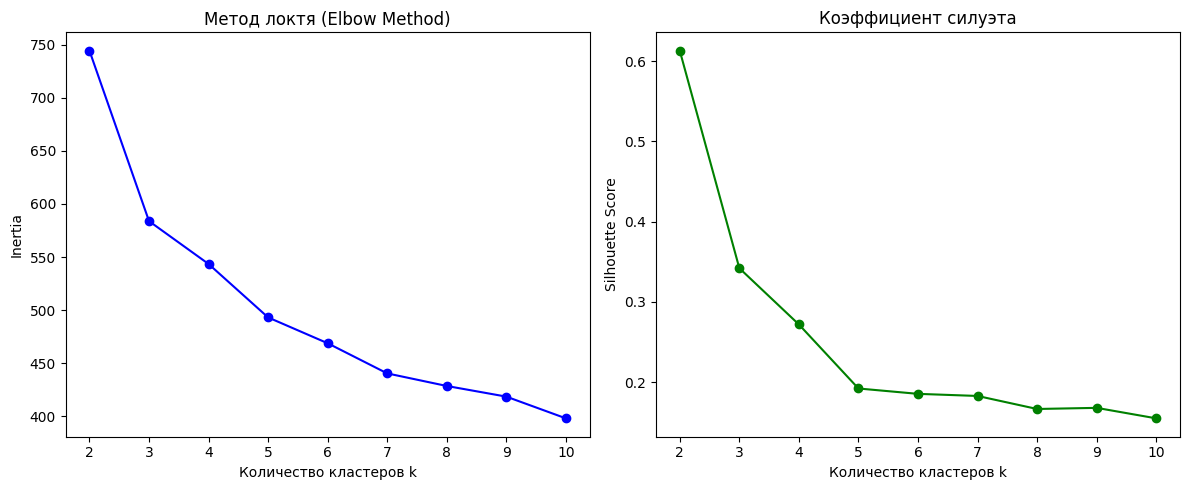

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)  # внутренняя метрика K-Means
    silhouettes.append(silhouette_score(X, kmeans.labels_))  # внешняя метрика

# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()


### DBSSCAN

### Алгоритм работы

Задаём два параметра:

1. eps — радиус окрестности точки,

2. min_samples — минимальное количество точек, которые должны находиться в этой окрестности, чтобы область считалась “плотной”.

Берём любую точку:

1. Если в её радиусе eps находится ≥ min_samples точек → это ядро кластера.

2. Все точки, попавшие в этот радиус, присоединяются к тому же кластеру.

Расширяем кластер:

1. Для каждой новой точки из найденных повторяем шаг 2, добавляя соседей.

2. Так кластер “растёт”, пока не закончатся плотные точки.

3. Если точка не попала ни в один кластер → она шум (cluster = -1).

In [14]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # параметры можно подобрать
clusters = dbscan.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Смотрим, какие кластеры сформировались
print("Количество найденных кластеров (без -1):", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Количество выбросов (cluster = -1):", np.sum(clusters == -1))

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean().round(2)

cluster_means


Количество найденных кластеров (без -1): 2
Количество выбросов (cluster = -1): 4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
-1,7.62,0.49,0.88,18.55,0.19,90.75,195.50,1.01,3.21,0.97,10.95,4.75
0,8.32,0.53,0.27,2.54,0.09,15.86,46.45,1.00,3.31,0.66,10.42,5.64
1,6.85,0.28,0.33,6.38,0.05,35.26,138.30,0.99,3.19,0.49,10.51,5.88


In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def interactive_dbscan_visualization_pca2d(X):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Масштабируем данные (DBSCAN чувствителен к масштабу!)
    X_scaled = StandardScaler().fit_transform(X)

    # Уменьшаем размерность до 2D через PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    def plot_dbscan(X_pca, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X_pca[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=12)

            xy = X_pca[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN (PCA 2D): eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.grid(True, alpha=0.3)
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN на данных после PCA
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X_pca)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X_pca, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.1, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=30, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(
        options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
        value='euclidean', description='metric:'
    )

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {
        'eps': eps_slider,
        'min_samples': min_samples_slider,
        'metric': metric_dropdown
    })
    display(ui, out)


In [83]:
interactive_dbscan_visualization_pca2d(X)


Output()

In [85]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Добавляем кластеры в DataFrame
df_cluster = df_base.copy()
df_cluster['cluster'] = clusters

# Убираем выбросы (-1) перед метриками
mask = clusters != -1
X_valid = X[mask]
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:  # нужно хотя бы 2 кластера для оценки
    sil = silhouette_score(X_valid, labels_valid)
    dbi = davies_bouldin_score(X_valid, labels_valid)
    chi = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")


Silhouette Score: 0.614
Davies-Bouldin Index: 0.614
Calinski-Harabasz Index: 11903.955


Когда мы используем **DBSCAN**, у нас нет встроенной метрики, как `inertia_` в K-Means.  
Поэтому качество кластеров оценивается **внешними метриками**, которые измеряют:
- Насколько **плотны** кластеры внутри себя  
- Насколько **далеко** они расположены друг от друга  


Также когда используем DBSSCAN, исключаем кластер с `label = -1`

---

##### 🧩 1. **Silhouette Score (Коэффициент силуэта)**

**Идея:** показывает, насколько хорошо каждая точка принадлежит своему кластеру  
и насколько далеко она от соседнего кластера.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

где:  
- $a(i)$ — среднее расстояние до точек **своего кластера**  
- $b(i)$ — среднее расстояние до точек **ближайшего другого кластера**

**Интерпретация:**

| Значение | Описание |
|-----------|-----------|
| **+1** | точка идеально внутри своего кластера |
| **0** | точка на границе |
| **< 0** | точка, вероятно, ошибочно отнесена к кластеру |

📏 Диапазон: `[-1, 1]`  
🟢 **Чем больше — тем лучше**

---

##### 🧩 2. **Davies–Bouldin Index (DBI)**

**Идея:** измеряет, насколько “похожи” кластеры между собой,  
учитывая их плотность и расстояния между центрами.

$$
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \frac{s_i + s_j}{d_{ij}}
$$

где:  
- $s_i$ — среднее расстояние точек к центру кластера $i
- $d_{ij}$ — расстояние между центрами кластеров $i$ и $j$

📏 Диапазон: `[0, ∞)`  
🟢 **Чем меньше — тем лучше**

Значения < 1.0 — хорошие,  > 2.0 — кластеры сильно пересекаются.

---

##### 🧩 3. **Calinski–Harabasz Index (CHI)**

**Идея:** сравнивает разброс между кластерами и внутри них.  
Показывает, насколько кластеры **плотные и отделённые**.

$$
CH = \frac{tr(B_k)}{tr(W_k)} \cdot \frac{N - k}{k - 1}
$$

где:  
- $tr(B_k)$ — межкластерная дисперсия  
- $tr(W_k)$ — внутрикластерная дисперсия  
- $N$ — число точек  
- $k$ — число кластеров

📏 Диапазон: `[0, ∞)`  
🟢 **Чем больше — тем лучше**

---

| Метрика | Диапазон | Лучше при | Что показывает |
|----------|-----------|------------|----------------|
| **Silhouette Score** | -1 → 1 | ↑ больше | Разделённость и чистота кластеров |
| **Davies–Bouldin Index** | 0 → ∞ | ↓ меньше | Схожесть между кластерами |
| **Calinski–Harabasz Index** | 0 → ∞ | ↑ больше | Отношение межкластерной к внутрикластерной дисперсии |



## Демо на текстовых данных

In [105]:
!pip install 'pymorphy3[fast]'

  Using cached pymorphy3-2.0.6-py3-none-any.whl.metadata (2.4 kB)
Using cached pymorphy3-2.0.6-py3-none-any.whl (53 kB)


In [1]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pymorphy3

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Инициализируем лемматизатор и список стоп-слов
morph = pymorphy3.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

# Чтение данных из файла
with open('/content/articles.txt', 'r', encoding='utf-8') as f:
    content = f.read()

# Разделяем данные на статьи
articles_raw = content.split('=====')

# Извлекаем заголовки и тексты статей
titles = []
texts = []

for article in articles_raw:
    lines = article.strip().split('\n')
    if len(lines) >= 6:
        # Извлекаем заголовок и текст статьи
        title = lines[4]
        text = ' '.join(lines[5:])
        titles.append(title)
        texts.append(text)

In [3]:
texts[:1]

['Большинство из нас видит Отечественную войну 1812 года глазами ее величайшего популяризатора – Льва Толстого. Формально «Война и мир» – книга художественная, но и автор, и многие читатели воспринимали ее как эпическое полотно из реального мира, в которое Толстой просто вплел судьбы кое-каких персонажей помельче. Из-за «толстовизации» истории Отечественной войны многие до сих пор считают, что Кутузов как полководец действовал мудро. Якобы он не хотел давать Наполеону Бородинского сражения, планируя скорее отдать Москву, и только под напором Александра I и двора это сражение он дал. Более того, Кутузов не хотел жертв со стороны русской армии и поэтому избегал решительных сражений с французами при их отступлении вдоль Старой смоленской дороги, и также поэтому не окружил их под Красным, еще в глубине России, где до границы было очень далеко. По той же причине же он не хотел и решительного сражения с Наполеоном на Березине, не гнал вперед свои уставшие войска, и от этого разгром Бонапарта

In [4]:
def preprocess_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию и цифры
    text = re.sub(r'[^а-яё\s]', '', text)
    # Токенизация
    words = text.split()
    # Удаление стоп-слов и лемматизация
    lemmatized = []
    for word in words:
        if word not in russian_stopwords:
            lemma = morph.parse(word)[0].normal_form
            lemmatized.append(lemma)
    return ' '.join(lemmatized)

# Применяем предобработку к каждому тексту
texts_preprocessed = [preprocess_text(text) for text in texts]


In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_preprocessed)


In [7]:
from sklearn.cluster import DBSCAN
# Параметры DBSCAN могут требовать подбора
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(X)


In [2]:
# Создаем DataFrame с заголовками и метками кластеров
df = pd.DataFrame({'title': titles, 'label': labels})

# Выводим количество кластеров
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

# Анализируем кластеры
for label in unique_labels:
    if label == -1:
        continue  # Пропускаем шум
    cluster_titles = df[df['label'] == label]['title'].head(3)
    print(f'\nКластер {label}:')
    for title in cluster_titles:
        print(f'- {title}')


NameError: name 'pd' is not defined

In [1]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Применяем PCA для уменьшения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Создаем DataFrame для визуализации
df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'PC3': X_pca[:, 2],
    'title': titles,
    'label': labels
})

# Создаем 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['PC1'],
    y=df_plot['PC2'],
    z=df_plot['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['label'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=df_plot['title'],
    hovertemplate='%{text}<extra></extra>'
)])

# Настраиваем внешний вид графика
fig.update_layout(
    title='3D PCA визуализация статей',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Генерируем кадры для анимации вращения графика
frames = []
for angle in range(0, 360, 10):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(angle)), y=2*np.sin(np.radians(angle)), z=1.5)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Добавляем кадры в график
fig.frames = frames

# Добавляем кнопки управления анимацией
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=0.8,
        x=1.05,
        xanchor='left',
        yanchor='top',
        buttons=[dict(label='Вращать',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True),
                                       transition=dict(duration=0),
                                       fromcurrent=True,
                                       mode='immediate')])]
    )]
)

# Отображаем график
fig.show()


NameError: name 'X' is not defined